In [2]:
# import libraries
import pandas as pd
import seaborn as sns
import datetime as dt

In [3]:
# get data
train_path = '../data/train.csv'
store_path = '../data/store.csv'

train = pd.read_csv(train_path)

c:\users\sheon\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Explore train.csv data

In [4]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,2015-04-30,6228,650,1,1,0,0
1,2,4,2015-04-30,6884,716,1,1,0,0
2,3,4,2015-04-30,9971,979,1,1,0,0
3,4,4,2015-04-30,16106,1854,1,1,0,0
4,5,4,2015-04-30,6598,729,1,1,0,0


In [5]:
train.info()

# Notes for prep:
# change 'Date' to datetime object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914629 entries, 0 to 914628
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          914629 non-null  int64 
 1   DayOfWeek      914629 non-null  int64 
 2   Date           914629 non-null  object
 3   Sales          914629 non-null  int64 
 4   Customers      914629 non-null  int64 
 5   Open           914629 non-null  int64 
 6   Promo          914629 non-null  int64 
 7   StateHoliday   914629 non-null  object
 8   SchoolHoliday  914629 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 62.8+ MB


In [6]:
# Check if store is closed, means 0 sales
train[train['Open']==0]['Sales'].max()
# so definitely if store is closed, sales would be 0
# and definitely if store has no customers, 0 sales

0

In [7]:
train[train['Open']==1]['Sales'].min()

0

In [8]:
train = train.drop(train[train['Customers']==0].index)

In [9]:
train = train.drop(train[train['Open']==0].index)

In [10]:
train[train['Sales']==0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
376069,1100,2,2014-04-29,0,3,1,1,0,0
787352,948,4,2013-04-25,0,5,1,1,0,0


In [11]:
train[(train['Customers']==0) & (train['Sales']>0)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [12]:
# Explore 'Store'
print('Total number of rows: ' + str(len(train)))
print('Total number of distinct stores:' + str(len(train['Store'].unique())))
print(train['Store'].value_counts())

Total number of rows: 759850
Total number of distinct stores:1115
423     850
562     850
1097    850
494     850
769     850
       ... 
145     533
100     531
744     530
348     522
644     517
Name: Store, Length: 1115, dtype: int64


In [13]:
# Explore 'DayOfWeek'
print('Total number of distinct DayOfWeek: ' + str(len(train['DayOfWeek'].unique())))
train[['DayOfWeek', 'Sales']].corr(method='spearman')

Total number of distinct DayOfWeek: 7


,DayOfWeek,Sales
DayOfWeek,1.000000,-0.176636
Sales,-0.176636,1.000000


In [14]:
train.groupby('DayOfWeek').mean()

,Store,Sales,Customers,Open,Promo,SchoolHoliday
DayOfWeek,,,,,,
1,558.467657,8183.268535,856.361524,1.0,0.559325,0.225605
2,558.429564,7050.389657,770.024793,1.0,0.535378,0.246090
3,558.309079,6689.777158,739.757070,1.0,0.537147,0.229120
4,558.456074,6754.162398,756.983061,1.0,0.549610,0.222123
5,558.354698,7045.980529,782.324520,1.0,0.518283,0.225552
6,558.378545,5856.989504,661.158011,1.0,0.000000,0.020815
7,572.873346,8216.643037,1448.164461,1.0,0.000000,0.025520


In [15]:
# Explore 'Date'
print('Total number of distinct Date: ' + str(len(train['Date'].unique())))
print(train['Date'].value_counts())
print('\n')

# Starts from 2013-01-01 to 2015-04-30
print(train['Date'].unique())
train.groupby('Date').mean()

train['Date'] = train['Date'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Total number of distinct Date: 850
2013-11-21    1115
2013-12-17    1115
2013-12-06    1115
2014-03-07    1115
2015-04-30    1115
              ... 
2014-12-07      16
2014-11-23      16
2014-12-14      16
2014-11-16      16
2013-03-29      16
Name: Date, Length: 850, dtype: int64


['2015-04-30' '2015-04-29' '2015-04-28' '2015-04-27' '2015-04-26'
 '2015-04-25' '2015-04-24' '2015-04-23' '2015-04-22' '2015-04-21'
 '2015-04-20' '2015-04-19' '2015-04-18' '2015-04-17' '2015-04-16'
 '2015-04-15' '2015-04-14' '2015-04-13' '2015-04-12' '2015-04-11'
 '2015-04-10' '2015-04-09' '2015-04-08' '2015-04-07' '2015-04-06'
 '2015-04-05' '2015-04-04' '2015-04-03' '2015-04-02' '2015-04-01'
 '2015-03-31' '2015-03-30' '2015-03-29' '2015-03-28' '2015-03-27'
 '2015-03-26' '2015-03-25' '2015-03-24' '2015-03-23' '2015-03-22'
 '2015-03-21' '2015-03-20' '2015-03-19' '2015-03-18' '2015-03-17'
 '2015-03-16' '2015-03-15' '2015-03-14' '2015-03-13' '2015-03-12'
 '2015-03-11' '2015-03-10' '2015-03-09' '2015-03-08' '20

In [16]:
# Explore 'Sales'
train['Sales'].describe()

count    759850.000000
mean       6928.144683
std        3106.308592
min           0.000000
25%        4829.000000
50%        6337.000000
75%        8330.000000
max       38722.000000
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Sales', ylabel='Count'>

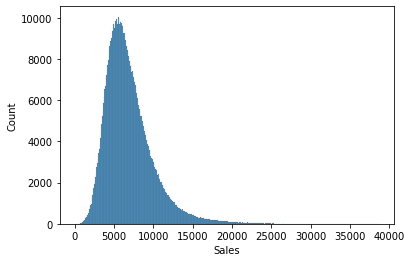

In [17]:
sns.histplot(train['Sales'])

In [18]:
# Explore 'Customers'
train['Customers'].describe()

count    759850.000000
mean        763.241284
std         401.766704
min           3.000000
25%         518.000000
50%         676.000000
75%         894.000000
max        7388.000000
Name: Customers, dtype: float64

In [19]:
train[['Customers', 'Sales']].corr()

,Customers,Sales
Customers,1.000000,0.826376
Sales,0.826376,1.000000


<AxesSubplot:xlabel='Customers', ylabel='Count'>

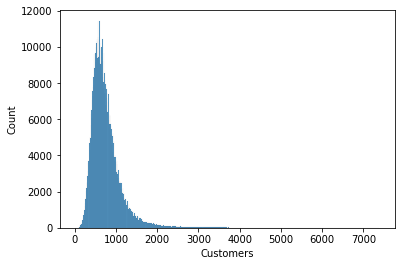

In [20]:
sns.histplot(train['Customers'])

In [21]:
# Explore 'Open'
print(train['Open'].unique())

[1]


c:\users\sheon\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Open', ylabel='count'>

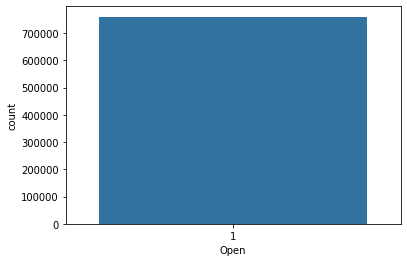

In [22]:
sns.countplot(train['Open'])

In [23]:
# Explore 'Promo'
print(train['Promo'].unique())
train[['Promo', 'Sales']].corr(method='spearman')

[1 0]


,Promo,Sales
Promo,1.000000,0.421156
Sales,0.421156,1.000000


c:\users\sheon\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Promo', ylabel='count'>

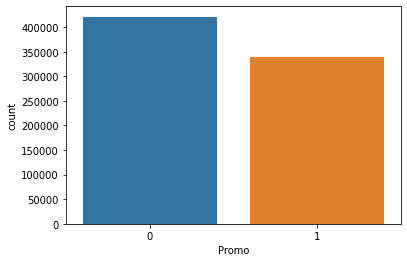

In [24]:
sns.countplot(train['Promo'])

In [25]:
train[train['Promo']==1]['Sales'].mean()

8205.116307096103

In [26]:
train[train['Promo']==0]['Sales'].mean()

5901.979598763821

In [27]:
train[train['Promo']==1]['Customers'].mean()

845.935165055885

In [28]:
train[train['Promo']==0]['Customers'].mean()

696.7890851606227

In [29]:
train['SalesPerCustomer'] = train['Sales']/train['Customers']

In [30]:
train[train['Promo']==0]['SalesPerCustomer'].mean()

8.89872708462644

In [31]:
train[train['Promo']==1]['SalesPerCustomer'].mean()

10.129569766250938

In [32]:
# Explore 'StateHoliday'
train['StateHoliday'] = train['StateHoliday'].replace(0, '0')
stateholiday = train[['Store', 'StateHoliday', 'Sales']]
stateholiday = pd.get_dummies(stateholiday, columns=['StateHoliday'])
stateholiday

,Store,Sales,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,6228,1,0,0,0
1,2,6884,1,0,0,0
2,3,9971,1,0,0,0
3,4,16106,1,0,0,0
4,5,6598,1,0,0,0
...,...,...,...,...,...,...
914196,682,3375,0,1,0,0
914247,733,10765,0,1,0,0
914283,769,5035,0,1,0,0
914462,948,4491,0,1,0,0


In [33]:
print(train['StateHoliday'].unique())
stateholiday[['StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c', 'Sales']].corr(method='spearman')

['0' 'b' 'a' 'c']


,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Sales
StateHoliday_0,1.000000,-0.840902,-0.443084,-0.310035,-0.007724
StateHoliday_a,-0.840902,1.000000,-0.000362,-0.000253,0.004786
StateHoliday_b,-0.443084,-0.000362,1.000000,-0.000134,0.004893
StateHoliday_c,-0.310035,-0.000253,-0.000134,1.000000,0.004925
Sales,-0.007724,0.004786,0.004893,0.004925,1.000000


c:\users\sheon\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='StateHoliday', ylabel='count'>

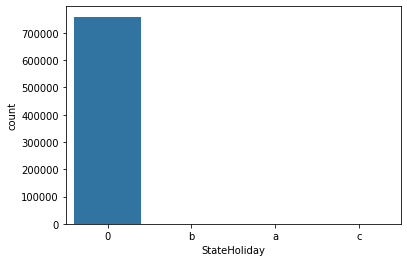

In [34]:
sns.countplot(train['StateHoliday'])

In [35]:
# Explore 'SchoolHoliday'
print(train['SchoolHoliday'].unique())

[0 1]


c:\users\sheon\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SchoolHoliday', ylabel='count'>

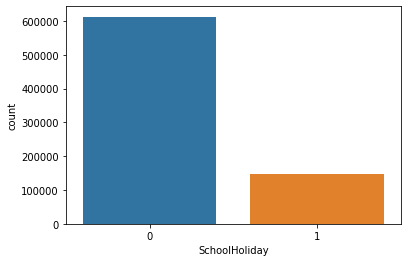

In [36]:
sns.countplot(train['SchoolHoliday'])

In [37]:
train[['SchoolHoliday', 'Sales']].corr(method='spearman')

,SchoolHoliday,Sales
SchoolHoliday,1.000000,0.035021
Sales,0.035021,1.000000


# Explore store.csv

In [38]:
import datetime as dt

store = pd.read_csv(store_path)

In [39]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [40]:
store.info()

# Notes for prep
# Change 'CompetitionOpenSinceMonth' to datetime object
# Change 'CompetitionOpenSinceYear' to datetime object
# Change 'Promo2SinceWeek' to datetime object
# Change 'Promo2SinceYear' to datetime object
# 'PromoInterval' is a list of the start of each promo.
    # checks out as all quarterly with different start months

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64


c:\users\sheon\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


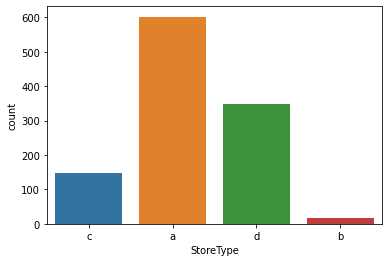

In [41]:
# Explore 'StoreType'
sns.countplot(store['StoreType'])
print(store['StoreType'].value_counts())

a    593
c    513
b      9
Name: Assortment, dtype: int64

c:\users\sheon\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


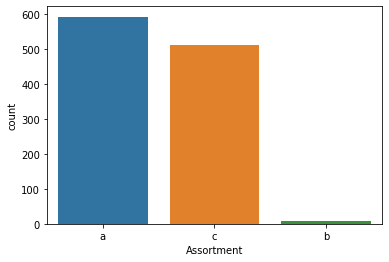

In [42]:
# Explore 'StoreType'
sns.countplot(store['Assortment'])
print(store['Assortment'].value_counts())

count     1112.000000
mean      5404.901079
std       7663.174720
min         20.000000
25%        717.500000
50%       2325.000000
75%       6882.500000
max      75860.000000
Name: CompetitionDistance, dtype: float64


c:\users\sheon\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CompetitionDistance'>

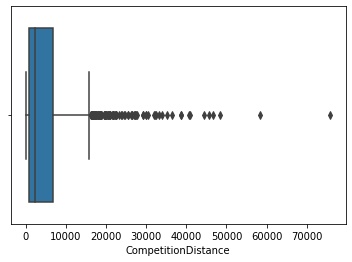

In [43]:
# Explore 'CompetitionDistance'
print(store['CompetitionDistance'].describe())
sns.boxplot(store['CompetitionDistance'])

In [44]:
store['Promo2'].unique()

array([0, 1], dtype=int64)

In [45]:
store.columns
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [46]:
store['CompetitionOpenSinceYear'].min()

1900.0

In [47]:
# Explore CompetitionSince variables
import datetime as dt

store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].fillna(0)
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].fillna(0)

store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].astype(int)
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].astype(int)

store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].astype(str)
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].astype(str)

store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].str.pad(width=2, side='left', fillchar='0')

store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].replace('00', '01')
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].replace('0', '1800')

store['CompetitionOpenSince'] = store['CompetitionOpenSinceMonth']+'_'+store['CompetitionOpenSinceYear']

In [48]:
store['CompetitionOpenSince'] = store['CompetitionOpenSince'].apply(lambda x: dt.datetime.strptime(x, '%m_%Y'))

In [49]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince
0,1,c,a,1270.0,09,2008,0,NaN,NaN,NaN,2008-09-01
1,2,a,a,570.0,11,2007,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2007-11-01
2,3,a,a,14130.0,12,2006,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2006-12-01
3,4,c,c,620.0,09,2009,0,NaN,NaN,NaN,2009-09-01
4,5,a,a,29910.0,04,2015,0,NaN,NaN,NaN,2015-04-01


In [50]:
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].fillna(0)
store['Promo2SinceYear'] = store['Promo2SinceYear'].fillna(0)

store['Promo2SinceWeek'] = store['Promo2SinceWeek'].astype(int)
store['Promo2SinceYear'] = store['Promo2SinceYear'].astype(int)

store['Promo2SinceWeek'] = store['Promo2SinceWeek'].astype(str)
store['Promo2SinceYear'] = store['Promo2SinceYear'].astype(str)

store['Promo2SinceWeek'] = store['Promo2SinceWeek'].str.pad(width=2, side='left', fillchar='0')

store['Promo2SinceWeek'] = store['Promo2SinceWeek'].replace('00', '01')
store['Promo2SinceYear'] = store['Promo2SinceYear'].replace('0', '1800')

store['Promo2Since'] = store['Promo2SinceWeek']+'_'+store['Promo2SinceYear']+' SUN'

In [51]:
store['Promo2SinceYear'].unique()

array(['1800', '2010', '2011', '2012', '2009', '2014', '2015', '2013'],
      dtype=object)

In [52]:
store['Promo2Since'] = store['Promo2Since'].apply(lambda x: dt.datetime.strptime(x, '%U_%Y %a'))

In [53]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince,Promo2Since
0,1,c,a,1270.0,09,2008,0,01,1800,NaN,2008-09-01,1800-01-05
1,2,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",2007-11-01,2010-03-28
2,3,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",2006-12-01,2011-04-03
3,4,c,c,620.0,09,2009,0,01,1800,NaN,2009-09-01,1800-01-05
4,5,a,a,29910.0,04,2015,0,01,1800,NaN,2015-04-01,1800-01-05


In [54]:
store[store['CompetitionOpenSince']=='1900-01-01']

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince,Promo2Since
814,815,a,a,590.0,01,1900,1,40,2014,"Jan,Apr,Jul,Oct",1900-01-01,2014-10-05


In [55]:
store['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [56]:
# Join store and train data
data = pd.merge(train, store, on='Store', how='left')
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince,Promo2Since
0,1,4,2015-04-30,6228,650,1,1,0,0,9.581538,...,a,1270.0,09,2008,0,01,1800,NaN,2008-09-01,1800-01-05
1,2,4,2015-04-30,6884,716,1,1,0,0,9.614525,...,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",2007-11-01,2010-03-28
2,3,4,2015-04-30,9971,979,1,1,0,0,10.184883,...,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",2006-12-01,2011-04-03
3,4,4,2015-04-30,16106,1854,1,1,0,0,8.687163,...,c,620.0,09,2009,0,01,1800,NaN,2009-09-01,1800-01-05
4,5,4,2015-04-30,6598,729,1,1,0,0,9.050754,...,a,29910.0,04,2015,0,01,1800,NaN,2015-04-01,1800-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759845,682,2,2013-01-01,3375,566,1,0,a,1,5.962898,...,a,150.0,09,2006,0,01,1800,NaN,2006-09-01,1800-01-05
759846,733,2,2013-01-01,10765,2377,1,0,a,1,4.528818,...,b,860.0,10,1999,0,01,1800,NaN,1999-10-01,1800-01-05
759847,769,2,2013-01-01,5035,1248,1,0,a,1,4.034455,...,b,840.0,01,1800,1,48,2012,"Jan,Apr,Jul,Oct",1800-01-01,2012-11-25
759848,948,2,2013-01-01,4491,1039,1,0,a,1,4.322425,...,b,1430.0,01,1800,0,01,1800,NaN,1800-01-01,1800-01-05


In [57]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince,Promo2Since
0,1,4,2015-04-30,6228,650,1,1,0,0,9.581538,...,a,1270.0,09,2008,0,01,1800,NaN,2008-09-01,1800-01-05
1,2,4,2015-04-30,6884,716,1,1,0,0,9.614525,...,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",2007-11-01,2010-03-28
2,3,4,2015-04-30,9971,979,1,1,0,0,10.184883,...,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",2006-12-01,2011-04-03
3,4,4,2015-04-30,16106,1854,1,1,0,0,8.687163,...,c,620.0,09,2009,0,01,1800,NaN,2009-09-01,1800-01-05
4,5,4,2015-04-30,6598,729,1,1,0,0,9.050754,...,a,29910.0,04,2015,0,01,1800,NaN,2015-04-01,1800-01-05


In [58]:
data['DaysSinceCompetitionOpen'] = data.apply(lambda x: 0 if x['CompetitionOpenSince'].year<=dt.date(1800, 12, 31).year else (0 if (x['Date'] <= x['CompetitionOpenSince']) else (x['Date']-x['CompetitionOpenSince']).days), axis=1)

In [59]:
type(dt.date(1800, 12, 31).year)

int

In [60]:
type(data['CompetitionOpenSince'].loc[0].year)

int

In [61]:
data['DaysSincePromo2'] = data.apply(lambda x: 0 if x['Promo2Since'].year<=dt.date(1800, 12, 31).year else (0 if (x['Date'] <= x['Promo2Since']) else (x['Date']-x['Promo2Since']).days), axis=1)

In [62]:
print(data['DaysSinceCompetitionOpen'].min())
print(data['DaysSincePromo2'].min())

0
0


In [63]:
data[data['DaysSinceCompetitionOpen']==data['DaysSinceCompetitionOpen'].max()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince,Promo2Since,DaysSinceCompetitionOpen,DaysSincePromo2
814,815,4,2015-04-30,9021,778,1,1,0,0,11.595116,...,01,1900,1,40,2014,"Jan,Apr,Jul,Oct",1900-01-01,2014-10-05,42122,207


In [64]:
data[data['DaysSincePromo2']==data['DaysSincePromo2'].min()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince,Promo2Since,DaysSinceCompetitionOpen,DaysSincePromo2
0,1,4,2015-04-30,6228,650,1,1,0,0,9.581538,...,09,2008,0,01,1800,NaN,2008-09-01,1800-01-05,2432,0
3,4,4,2015-04-30,16106,1854,1,1,0,0,8.687163,...,09,2009,0,01,1800,NaN,2009-09-01,1800-01-05,2067,0
4,5,4,2015-04-30,6598,729,1,1,0,0,9.050754,...,04,2015,0,01,1800,NaN,2015-04-01,1800-01-05,29,0
5,6,4,2015-04-30,7287,760,1,1,0,0,9.588158,...,12,2013,0,01,1800,NaN,2013-12-01,1800-01-05,515,0
6,7,4,2015-04-30,12603,1162,1,1,0,0,10.845955,...,04,2013,0,01,1800,NaN,2013-04-01,1800-01-05,759,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759844,676,2,2013-01-01,3821,777,1,0,a,1,4.917632,...,09,2008,0,01,1800,NaN,2008-09-01,1800-01-05,1583,0
759845,682,2,2013-01-01,3375,566,1,0,a,1,5.962898,...,09,2006,0,01,1800,NaN,2006-09-01,1800-01-05,2314,0
759846,733,2,2013-01-01,10765,2377,1,0,a,1,4.528818,...,10,1999,0,01,1800,NaN,1999-10-01,1800-01-05,4841,0
759848,948,2,2013-01-01,4491,1039,1,0,a,1,4.322425,...,01,1800,0,01,1800,NaN,1800-01-01,1800-01-05,0,0


In [65]:
data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,SalesPerCustomer,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince,Promo2Since,DaysSinceCompetitionOpen,DaysSincePromo2
0,1,4,2015-04-30,6228,650,1,1,0,0,9.581538,...,09,2008,0,01,1800,NaN,2008-09-01,1800-01-05,2432,0
1,2,4,2015-04-30,6884,716,1,1,0,0,9.614525,...,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",2007-11-01,2010-03-28,2737,1859
2,3,4,2015-04-30,9971,979,1,1,0,0,10.184883,...,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",2006-12-01,2011-04-03,3072,1488
3,4,4,2015-04-30,16106,1854,1,1,0,0,8.687163,...,09,2009,0,01,1800,NaN,2009-09-01,1800-01-05,2067,0
4,5,4,2015-04-30,6598,729,1,1,0,0,9.050754,...,04,2015,0,01,1800,NaN,2015-04-01,1800-01-05,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759845,682,2,2013-01-01,3375,566,1,0,a,1,5.962898,...,09,2006,0,01,1800,NaN,2006-09-01,1800-01-05,2314,0
759846,733,2,2013-01-01,10765,2377,1,0,a,1,4.528818,...,10,1999,0,01,1800,NaN,1999-10-01,1800-01-05,4841,0
759847,769,2,2013-01-01,5035,1248,1,0,a,1,4.034455,...,01,1800,1,48,2012,"Jan,Apr,Jul,Oct",1800-01-01,2012-11-25,0,37
759848,948,2,2013-01-01,4491,1039,1,0,a,1,4.322425,...,01,1800,0,01,1800,NaN,1800-01-01,1800-01-05,0,0


In [66]:
data['DaysSincePromo2'].max()

2097

In [67]:
data['DaysSinceCompetitionOpen'].max()

42122

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759850 entries, 0 to 759849
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      759850 non-null  int64         
 1   DayOfWeek                  759850 non-null  int64         
 2   Date                       759850 non-null  datetime64[ns]
 3   Sales                      759850 non-null  int64         
 4   Customers                  759850 non-null  int64         
 5   Open                       759850 non-null  int64         
 6   Promo                      759850 non-null  int64         
 7   StateHoliday               759850 non-null  object        
 8   SchoolHoliday              759850 non-null  int64         
 9   SalesPerCustomer           759850 non-null  float64       
 10  StoreType                  759850 non-null  object        
 11  Assortment                 759850 non-null  object  

In [69]:
# Columns to consider:
# DayOfWeek
# Sales - TARGET
# Customer
# Promo
# StateHoliday
# SchoolHoliday
# StoreType
# Assortment
# CompetitionDistance
# Promo2
# DaysSinceCompetitionOpen
# DaysSincePromo2

In [70]:
for storetype in data['StoreType'].unique():
    print(storetype)
    print(data[data['StoreType']==storetype]['Sales'].mean())

c
6916.7267431580185
a
6906.5569506443135
d
6777.804663444171
b
10143.479174108737


In [71]:
for assort in data['Assortment'].unique():
    print(assort)
    print(data[data['Assortment']==assort]['Sales'].mean())

a
6607.348458946905
c
7259.541986422668
b
8497.800460579789


In [72]:
data.groupby('StoreType')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,411523.0,6906.556951,3279.361667,0.0,4673.0,6262.0,8386.0,38025.0
b,13997.0,10143.479174,5162.382056,0.0,6259.0,9044.0,13070.0,38722.0
c,101798.0,6916.726743,2920.438516,133.0,4885.0,6381.0,8332.0,31448.0
d,232532.0,6777.804663,2552.432039,538.0,5007.0,6348.0,8073.0,38037.0


In [73]:
data.groupby('StoreType')['Customers', 'Sales'].sum()

<ipython-input-73-0e6878daa495>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('StoreType')['Customers', 'Sales'].sum()


,Customers,Sales
StoreType,,
a,327816932,2842207036
b,28110609,141978278
c,83229977,704108949
d,140791372,1576056474


In [76]:
data['Day'] = data.apply(lambda x: x['Date'].day, axis=1)
data['Month'] = data.apply(lambda x: x['Date'].month, axis=1)
data['Year'] = data.apply(lambda x: x['Date'].year, axis=1)

In [80]:
data.groupby('Month')['Sales'].mean()

Month
1     6564.298651
2     6589.494012
3     6976.817749
4     7046.487067
5     7010.407968
6     6846.963914
7     6910.099462
8     6649.229053
9     6547.469104
10    6602.967255
11    7188.554250
12    8608.956661
Name: Sales, dtype: float64